## Objective

To predict whether a liability customer will buy a personal loan or not.

- Which variables are most significant.
- Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

#### Import Packages

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)


#### Read Data


In [2]:
df = pd.read_csv('Loan_Modelling.csv')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') 
df.head()

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.shape

(5000, 14)

In [6]:
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Observations
- No Duplicate data
- No null data 
- 14 columns 
- All values are numeric
- ID is a sequentail number not different than the index

In [7]:
df.drop(['ID'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [9]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [10]:
# function to display Missing values for a dataframe
def checkna(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]

In [11]:
checkna(df)

,Features,Missing_Values,Missing_Percent


#### No Missing Data 

Personal_Loan,Securities_Account, CD_Account, Online, CreditCard all have boolean values

In [12]:
df.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df['Experience'].unique()


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [14]:
df['Family'].unique()


array([4, 3, 1, 2])

In [15]:
df['Education'].unique()


array([1, 2, 3])

In [16]:
df[df['Experience'] < 1 ]['Experience'].value_counts()

 0    66
-1    33
-2    15
-3     4
Name: Experience, dtype: int64

- 66 without Experience 
- Negative value seems to be a mistake. We could potentially switch it to 0
- Personal_Loan is target variable

In [17]:
df[df['Experience'] < 0 ]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


## EDA

In [18]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    
    
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Risk"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Risk"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Display Graph for  Education


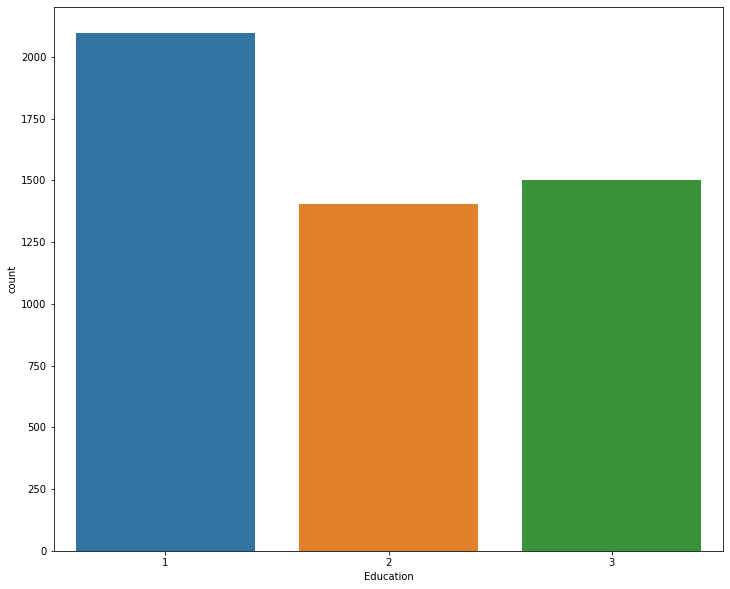

Display Graph for  Family


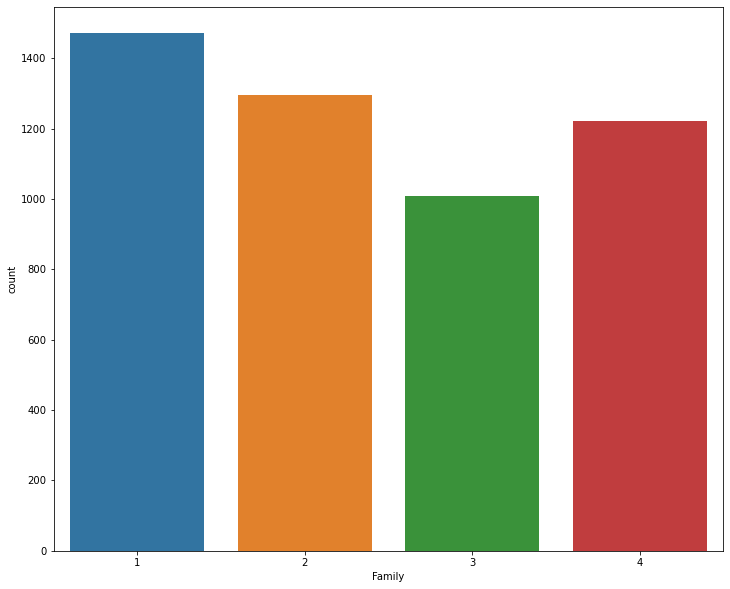

Display Graph for  Experience


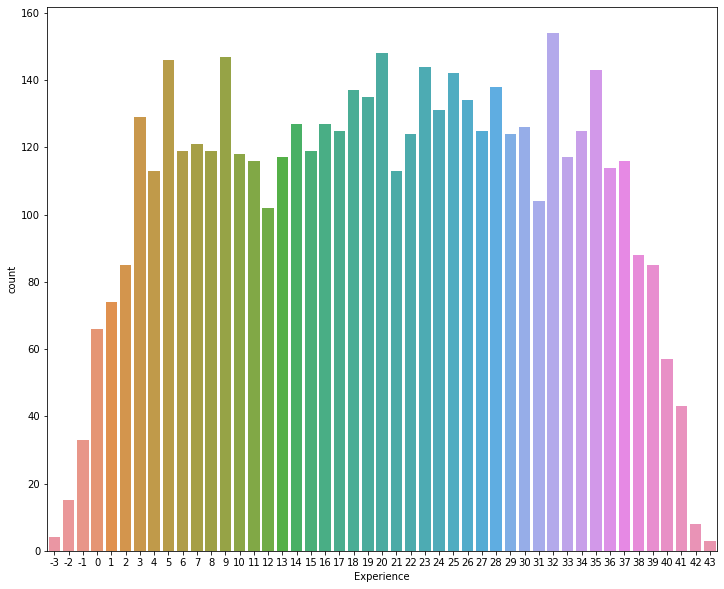

In [19]:
for i in list(['Education', 'Family', 'Experience']):  
     print("Display Graph for ", i)
     plt.figure(figsize= [12,10])
     sns.countplot(df[i])
     plt.show()

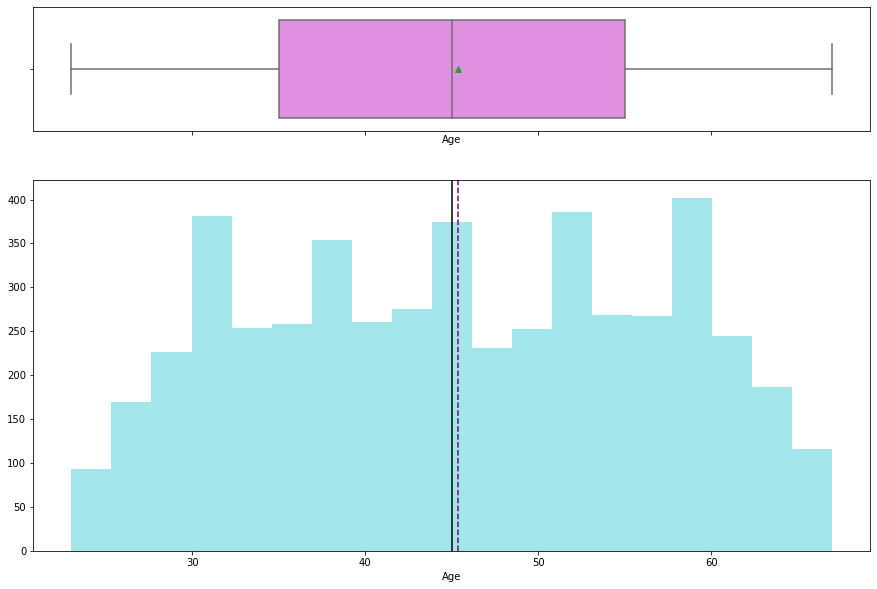

In [20]:
histogram_boxplot(df["Age"])


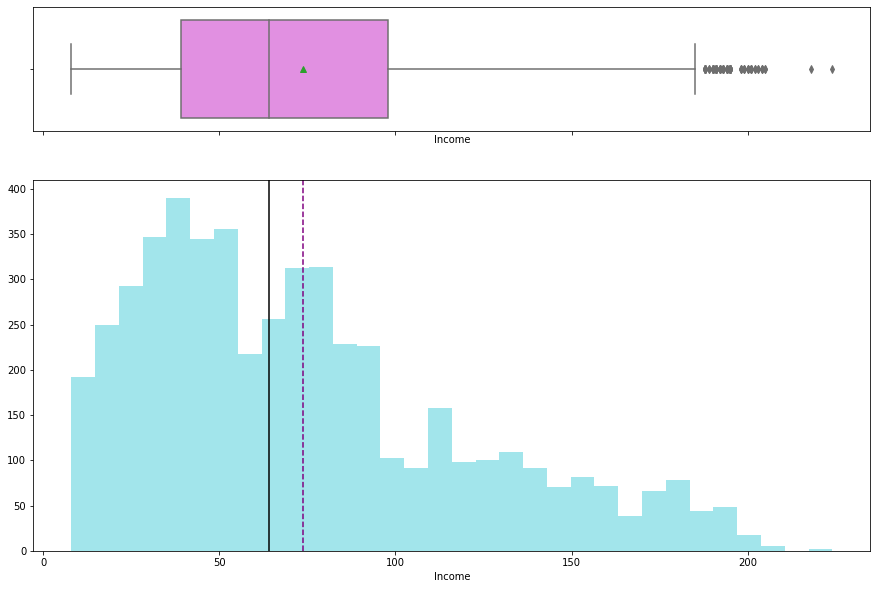

In [21]:
histogram_boxplot(df["Income"])


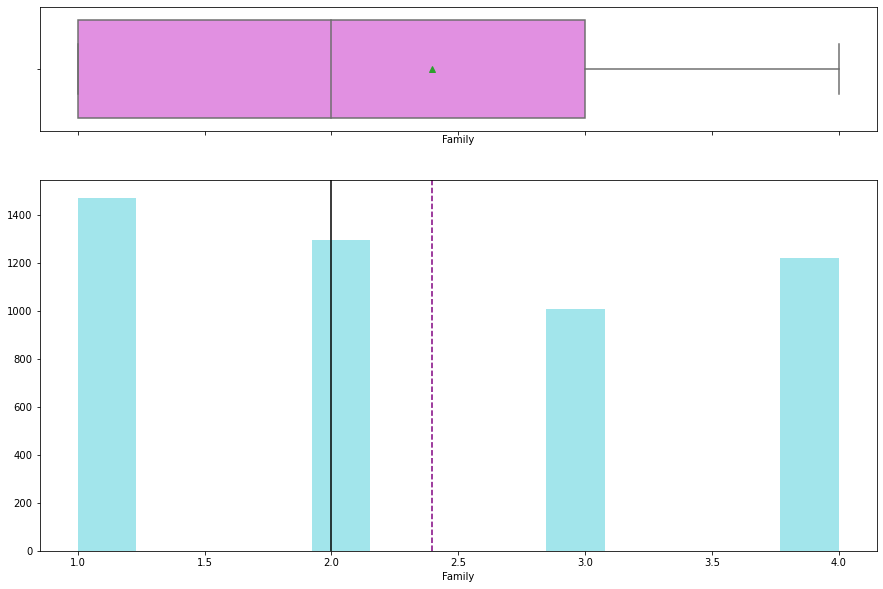

In [22]:
histogram_boxplot(df["Family"])


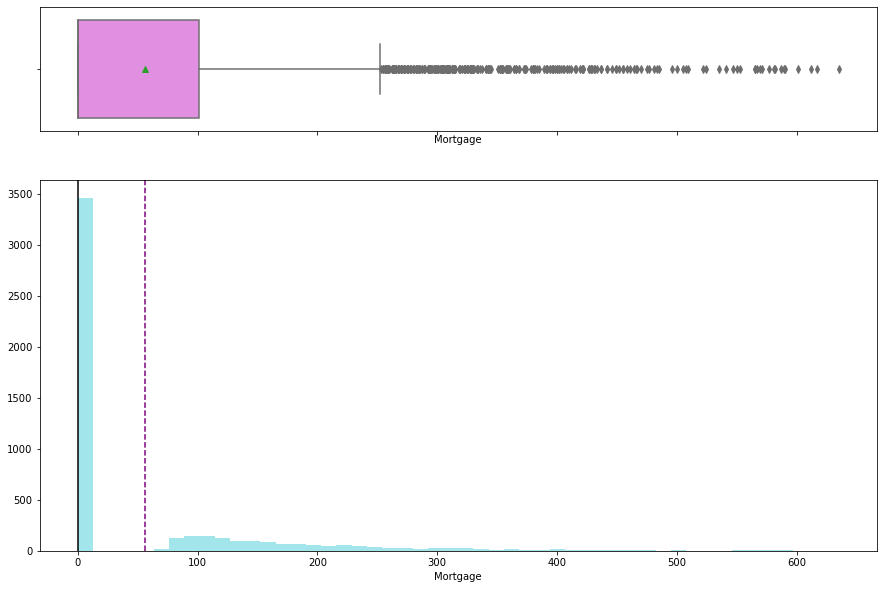

In [23]:
histogram_boxplot(df["Mortgage"])


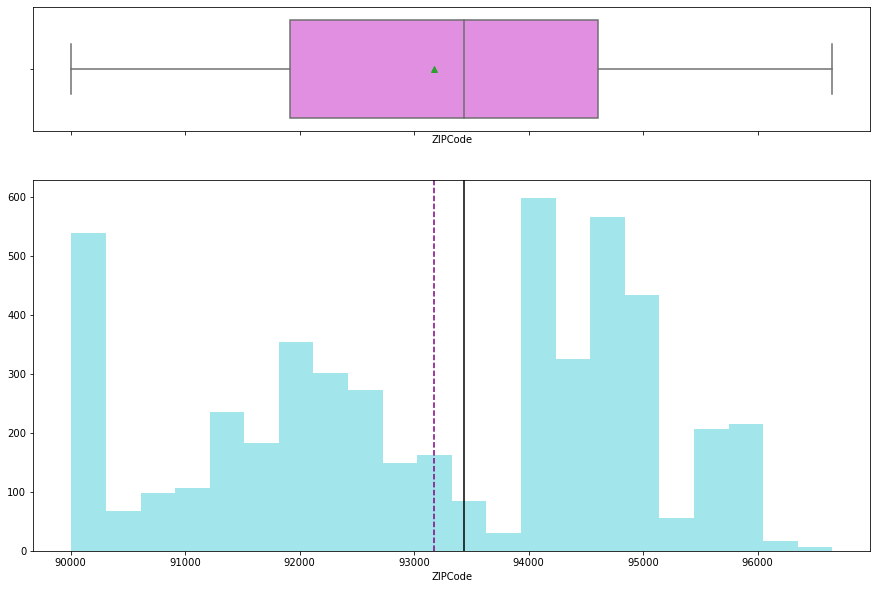

In [24]:
histogram_boxplot(df["ZIPCode"])

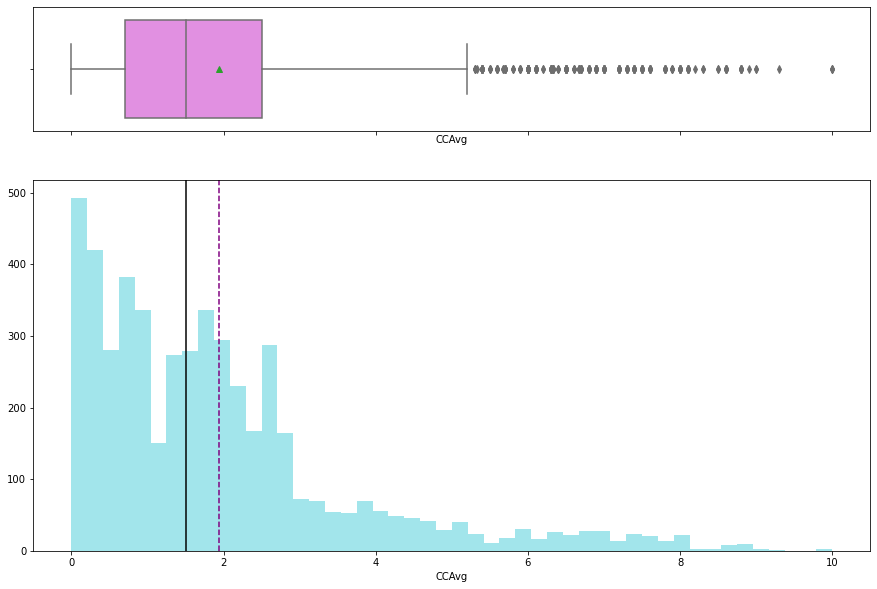

In [25]:
histogram_boxplot(df["CCAvg"])

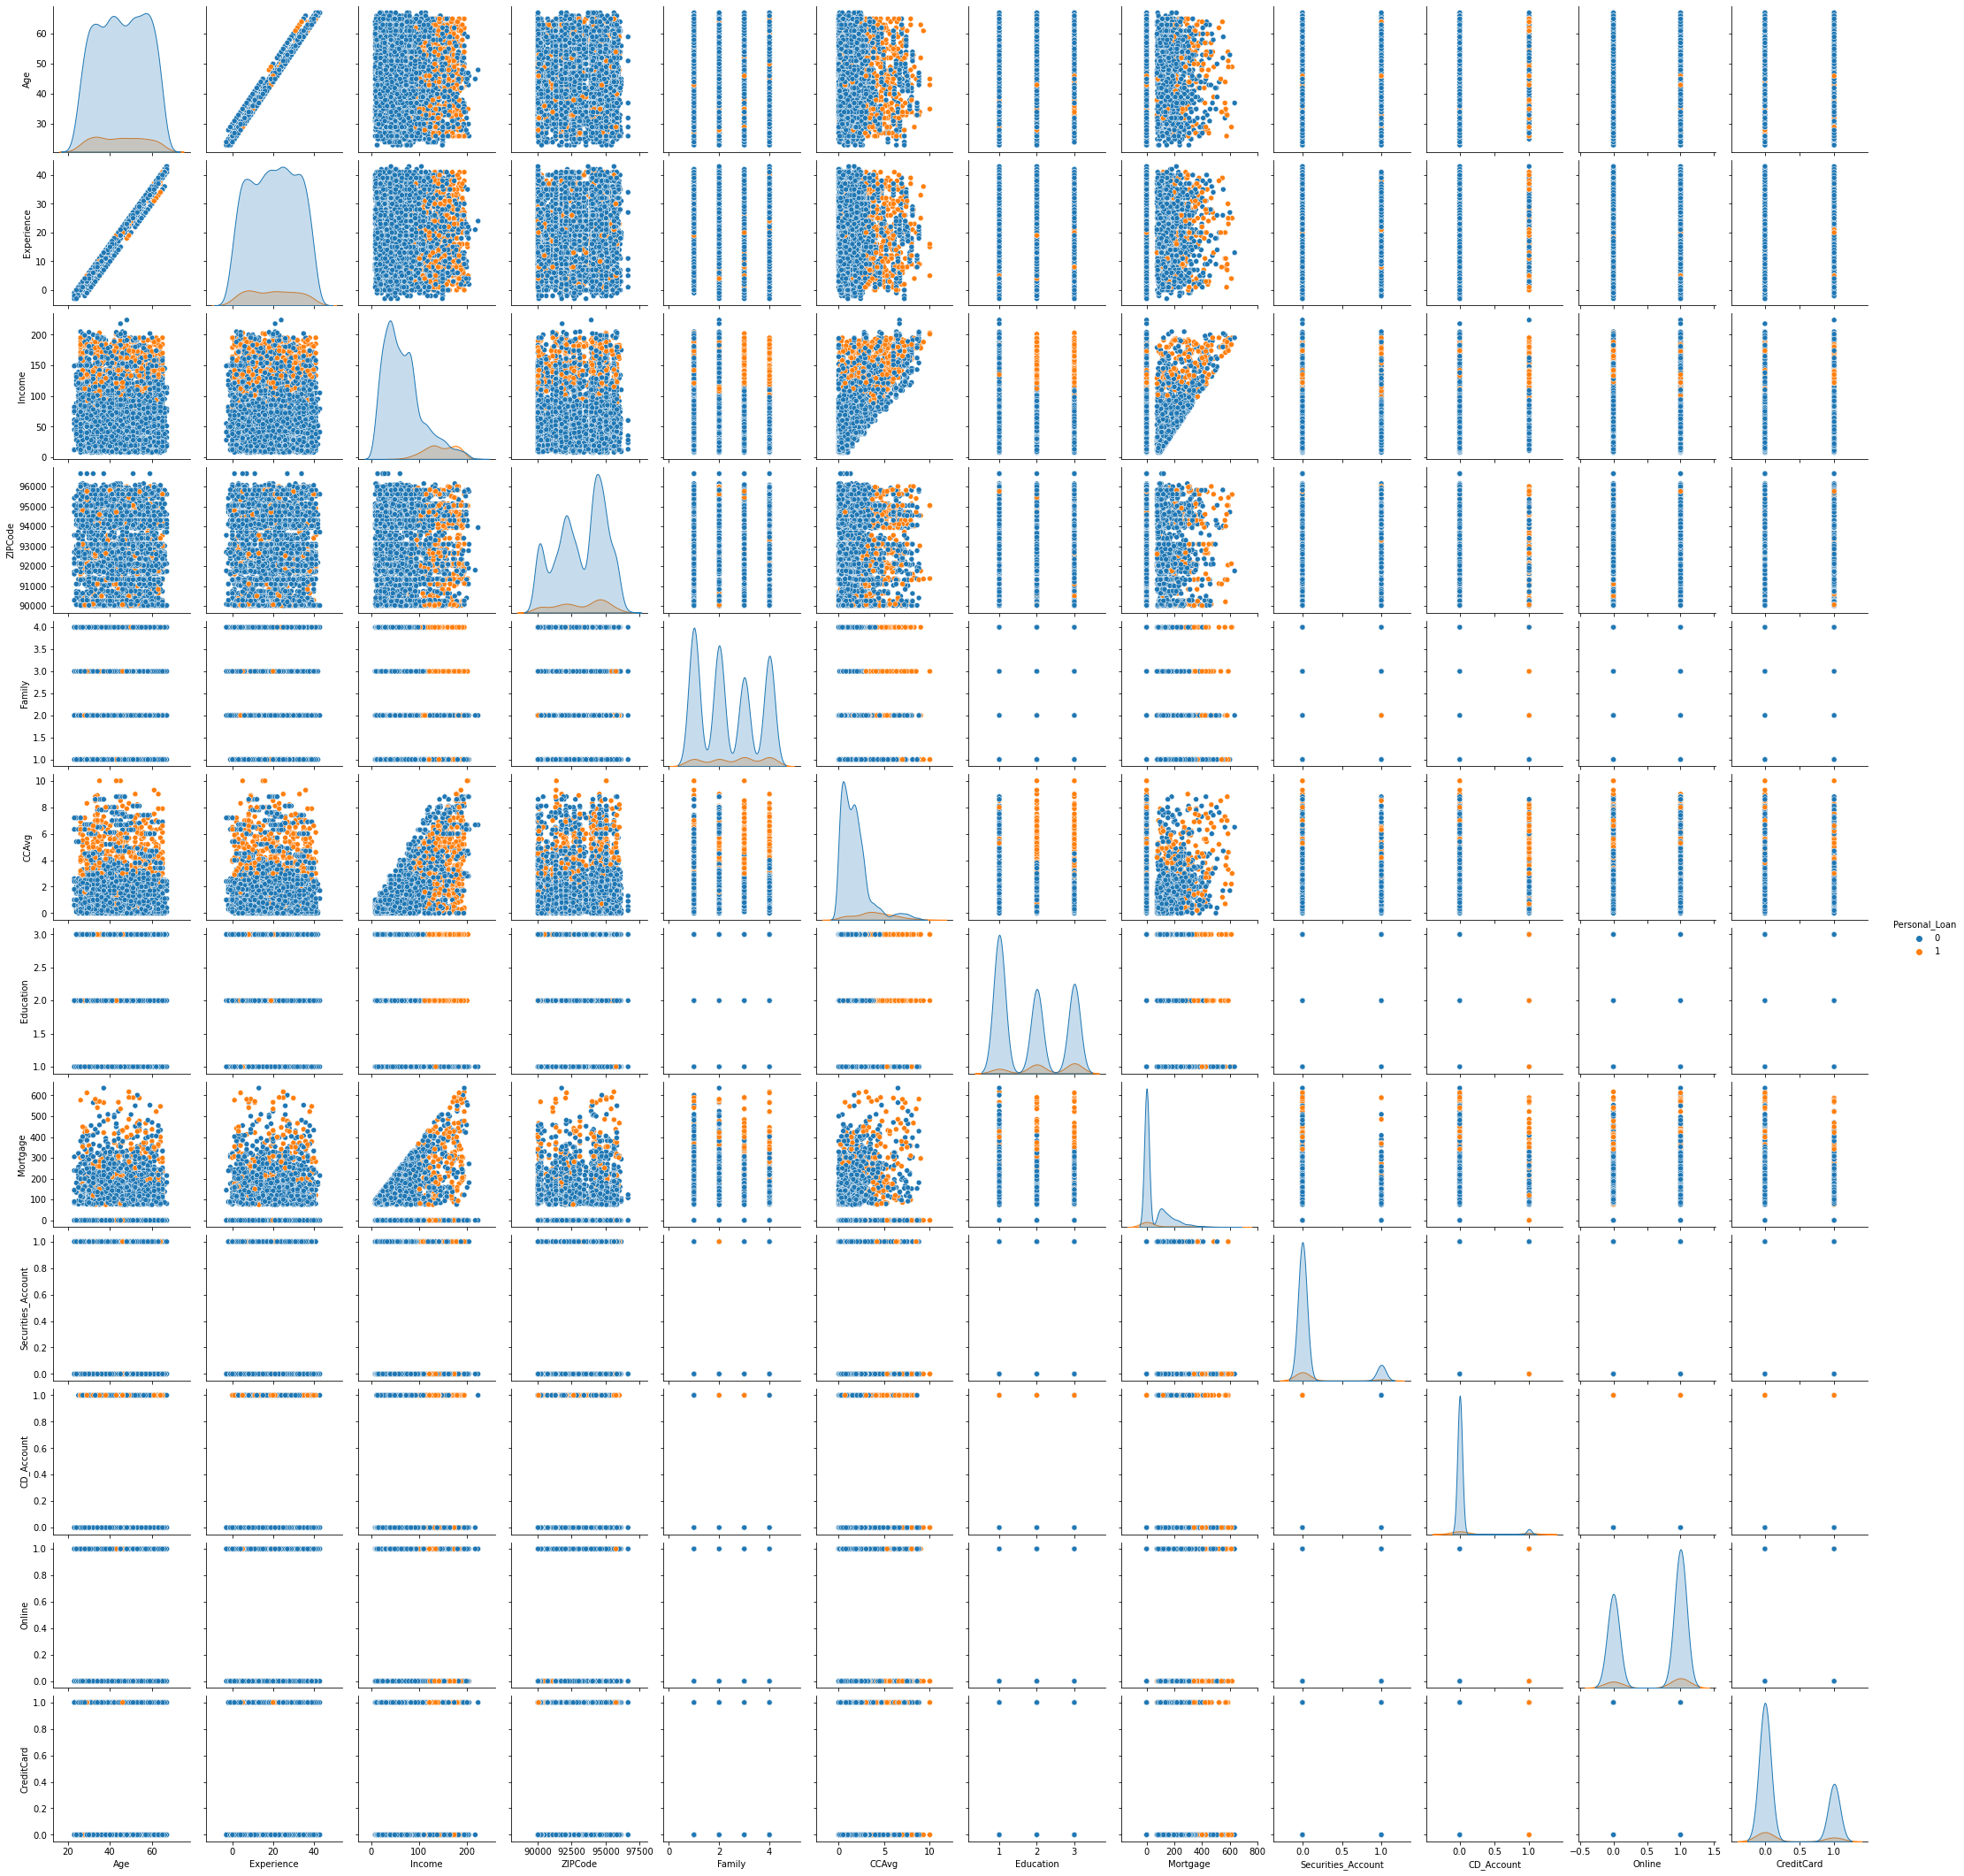

In [26]:
sns.pairplot(df,hue='Personal_Loan')


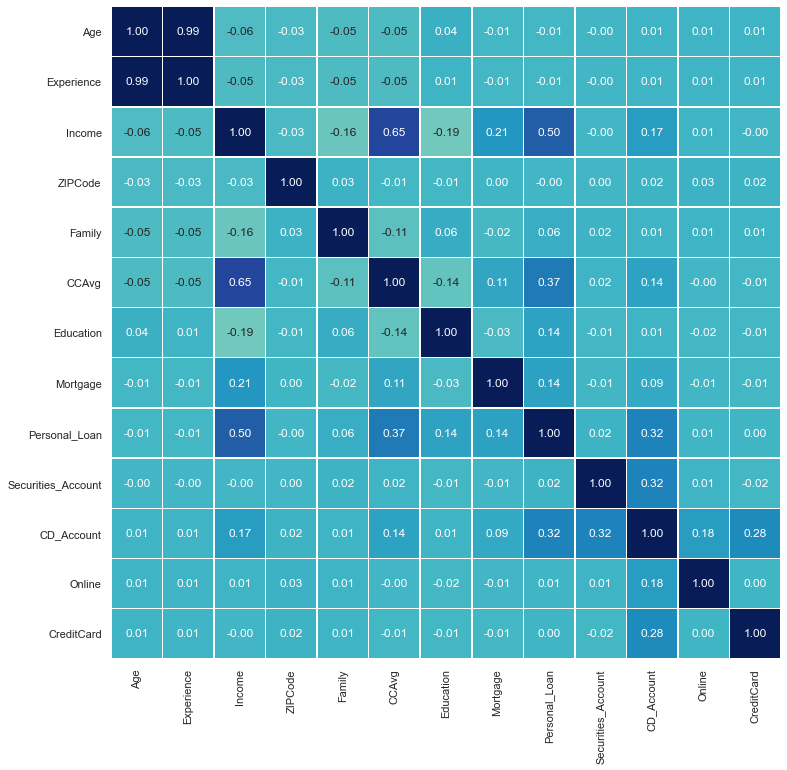

In [27]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

## Logistic Regression 

In [28]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores


def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
X = df.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [30]:
### CHECKING MULTICOLINEARITY

In [31]:

# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)


In [32]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 3281.091392
Age                     93.676205
Experience              93.577581
Income                   1.861062
ZIPCode                  1.004519
Family                   1.034471
CCAvg                    1.729094
Education                1.115067
Mortgage                 1.051350
Securities_Account       1.137195
CD_Account               1.330194
Online                   1.040250
CreditCard               1.108229
dtype: float64



In [33]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

Accuracy on training set :  0.9108571428571428
Accuracy on test set :  0.902
Recall on training set :  0.3065015479876161
Recall on test set :  0.31210191082802546
Precision on training set :  0.5294117647058824
Precision on test set :  0.5568181818181818
F1 on training set :  0.38823529411764707
F1 on test set :  0.39999999999999997


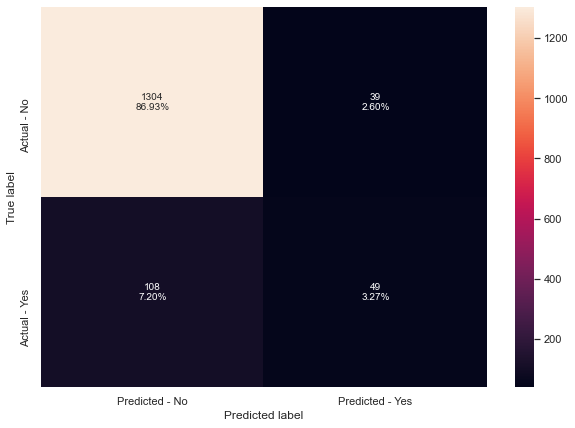

In [37]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

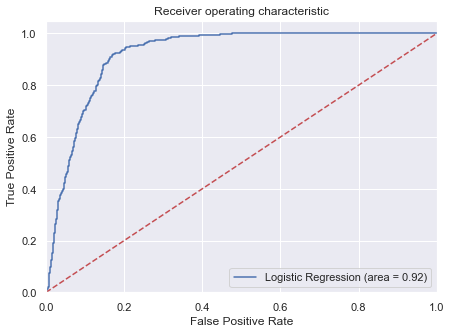

In [38]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,0.000161,0.000173,0.036188,-0.000066,0.000168,0.001048,0.00024,0.000929,0.000009,0.00013,0.000015,-0.000002


In [40]:
odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train.columns, columns=['odds']).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
odds,0.016088,0.017286,3.685063,0.006601,0.016791,0.104874,0.024001,0.092976,0.000865,0.013048,0.001457,0.000241


In [41]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.07070371289918795


In [42]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [43]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))


print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9108571428571428
Accuracy on test data: 0.902
Recall on train data: 0.3065015479876161
Recall on test data: 0.31210191082802546
Precision on train data: 0.5294117647058824
Precision on test data: 0.5568181818181818
ROC-AUC Score on train data: 0.6394012303992219
ROC-AUC Score on test data: 0.6415312234706024


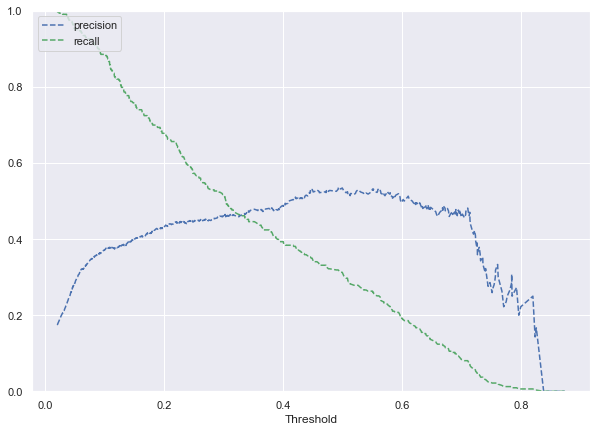

In [44]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [45]:
optimal_threshold = 0.35

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.904
Accuracy on test data: 0.8973333333333333
Recall on train data: 0.4458204334365325
Recall on test data: 0.46496815286624205
Precision on train data: 0.47840531561461797
Precision on test data: 0.5104895104895105
ROC-AUC Score on train data: 0.698201371896107
ROC-AUC Score on test data: 0.7064230190987949


In [47]:
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)
X_train.shape

(3500, 12)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2021-05-12 21:45:24] Features: 1/12 -- score: 0.38054389499421565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.8s finished

[2021-05-12 21:45:25] Features: 2/12 -- score: 0.6133782873996815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished

[2021-05-12 21:45:26] Features: 3/12 -- score: 0.6622085680150197[Parallel(n_jobs=-1)]: Using backend

{1: {'feature_idx': (2,), 'cv_scores': array([0.43786982, 0.41237113, 0.29139073]), 'avg_score': 0.38054389499421565, 'feature_names': ('Income',), 'ci_bound': 0.14378367428909095, 'std_dev': 0.06389450212870292, 'std_err': 0.04518023573574414}, 2: {'feature_idx': (2, 6), 'cv_scores': array([0.6519337 , 0.60638298, 0.58181818]), 'avg_score': 0.6133782873996815, 'feature_names': ('Income', 'Education'), 'ci_bound': 0.06536931895791355, 'std_dev': 0.029048778381546493, 'std_err': 0.02054058817877671}, 3: {'feature_idx': (2, 6, 9), 'cv_scores': array([0.67741935, 0.63492063, 0.67428571]), 'avg_score': 0.6622085680150197, 'feature_names': ('Income', 'Education', 'CD_Account'), 'ci_bound': 0.04351652125266186, 'std_dev': 0.019337845367767923, 'std_err': 0.013673921593085565}, 4: {'feature_idx': (2, 6, 9, 11), 'cv_scores': array([0.67741935, 0.65240642, 0.67052023]), 'avg_score': 0.6667820010549607, 'feature_names': ('Income', 'Education', 'CD_Account', 'CreditCard'), 'ci_bound': 0.023736622

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished

[2021-05-12 21:45:32] Features: 12/12 -- score: 0.6925963128210318

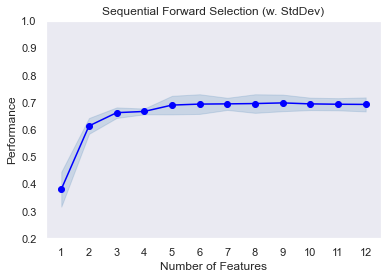

In [55]:
# we will first build model with all varaible
sfs = SFS(m, k_features=12, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)


print(sfs.get_metric_dict())

fig1 = plot_sfs(sfs.get_metric_dict(), figsize=(6, 4))


plt.ylim([0.2, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [50]:
help(plot_sfs)

Help on function plot_sequential_feature_selection in module mlxtend.plotting.plot_sequential_feature_selection:

plot_sequential_feature_selection(metric_dict, figsize=None, kind='std_dev', color='blue', bcolor='steelblue', marker='o', alpha=0.2, ylabel='Performance', confidence_interval=0.95)
    Plot feature selection results.
    
    Parameters
    ----------
    metric_dict : mlxtend.SequentialFeatureSelector.get_metric_dict() object
    figsize : tuple (default: None)
        Height and width of the figure
    kind : str (default: "std_dev")
        The kind of error bar or confidence interval in
        {'std_dev', 'std_err', 'ci', None}.
    color : str (default: "blue")
        Color of the lineplot (accepts any matplotlib color name)
    bcolor : str (default: "steelblue").
        Color of the error bars / confidence intervals
        (accepts any matplotlib color name).
    marker : str (default: "o")
        Marker of the line plot
        (accepts any matplotlib marker n